# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. Use this notebook to create your visualizations.

Below we set up the dataframe with the Goodreads dataset for you. If you run this cell, you may get an error that some lines were skipped. Do not worry about that! For this studio, we want to focus on creating an effective

In [4]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("books.csv", error_bad_lines=False)

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years


b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [6]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  year                11123 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


With your dataframe set up, time to start creating visualizations!

In [9]:
# Use your Python skills to create a visualization here.
# Assuming 'publication_date' is the column with dates in your DataFrame
df['Publication_Date'] = pd.to_datetime(df['publication_date'], errors='coerce')


In [11]:
# Drop rows where 'Publication_Date' is NaT (missing date)
df = df.dropna(subset=['Publication_Date'])


In [21]:
# Create a new column 'Publication_Year'
df['Publication_Year'] = df['Publication_Date'].dt.year


In [22]:
# Group by 'Publication_Year' and count the number of books each year
df_year = df.groupby('Publication_Year').size()


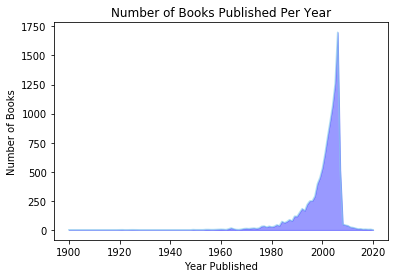

In [37]:
# Plot a simple area chart
plt.fill_between(df_year.index, df_year.values, color="blue", alpha=0.4)
plt.plot(df_year.index, df_year.values, color="Skyblue", alpha=0.6)
plt.xlabel('Year Published')
plt.ylabel('Number of Books')
plt.title('Number of Books Published Per Year')
plt.show()


In [28]:
# Use your Python skills to create a visualization here.
# Create a new column 'Decade' that represents the decade of publication
df['Decade'] = (df['Publication_Year'] // 10) * 10


In [32]:
# Count the number of books per decade
decade_counts = df['Decade'].value_counts().sort_index()


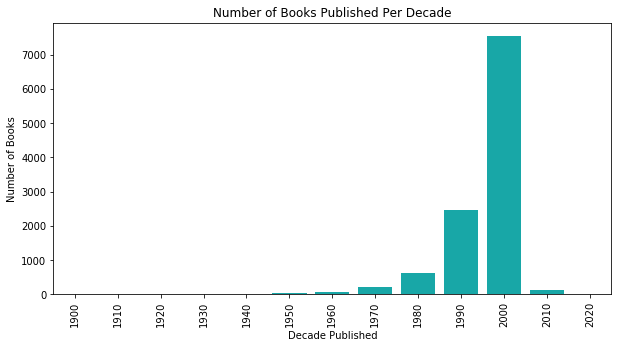

In [35]:
# Create the plot
plt.figure(figsize=(10, 5))
sb.barplot(x=decade_counts.index, y=decade_counts.values, color='c')
plt.xlabel('Decade Published')
plt.ylabel('Number of Books')
plt.title('Number of Books Published Per Decade')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if many years
plt.show()